### 0. 사용할 패키지 불러오기

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

width = 16
height = 16

def generate_dataset(samples):
    
    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
        
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)

def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0]*width), int(ipt[1]*height)] = 1
        
    return img.reshape(width, height, 1)

### 1. 데이터셋 생성하기

In [2]:
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

### 2. 모델 구성하기

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

### 3. 모델 학습과정 설정하기

In [8]:
model.compile(loss='mse', optimizer='adam')

### 4. 모델 학습시키기

In [10]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

Train on 1500 samples, validate on 300 samples
Epoch 1/1000
1500/1500 [==============================] - 1s 934us/step - loss: 11303.3476 - val_loss: 1855.1568
Epoch 2/1000
1500/1500 [==============================] - 1s 429us/step - loss: 1442.0592 - val_loss: 1308.0393
Epoch 3/1000
1500/1500 [==============================] - 1s 442us/step - loss: 999.4576 - val_loss: 1033.6445
Epoch 4/1000
1500/1500 [==============================] - 1s 436us/step - loss: 783.1345 - val_loss: 811.6163
Epoch 5/1000
1500/1500 [==============================] - 1s 484us/step - loss: 548.8815 - val_loss: 521.1551
Epoch 6/1000
1500/1500 [==============================] - 1s 480us/step - loss: 345.1773 - val_loss: 363.4373
Epoch 7/1000
1500/1500 [==============================] - 1s 447us/step - loss: 271.7961 - val_loss: 309.9766
Epoch 8/1000
1500/1500 [==============================] - 1s 487us/step - loss: 254.0443 - val_loss: 295.4410
Epoch 9/1000
1500/1500 [==============================] - 1s 567us/

### 5. 학습과정 살펴보기

Text(0.5, 0, 'epoch')

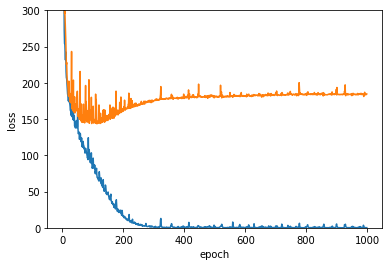

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')

### 6. 모델 평가하기

In [13]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

100/100 [==============================] - 0s 259us/step
191.99516906738282


### 7. 모델 사용하기

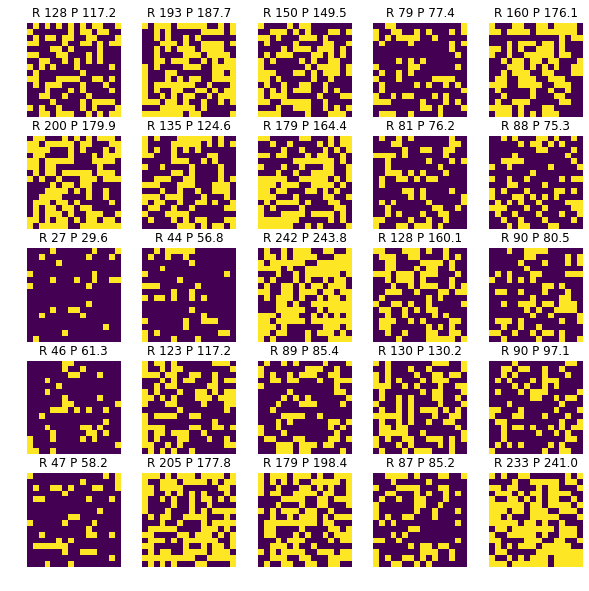

In [15]:
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()